In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [36]:
#b. Examine the features, their types, and summary statistics.
train_data = pd.read_csv('Titanic_train.csv')
test_data = pd.read_csv("Titanic_test.csv")

# 1. Data Exploration:

In [111]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [109]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [38]:
print("Train Dataset Info:")
print(train_data.info())

Train Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [8]:
print("\nTest Data Info:")
print(test_data.info())


Test Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB
None


In [9]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [11]:
print("\nMissing Values:")
print(train_data.isnull().sum())


Missing Values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [12]:
print("\nMissing Values:")
print(test_data.isnull().sum())


Missing Values:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


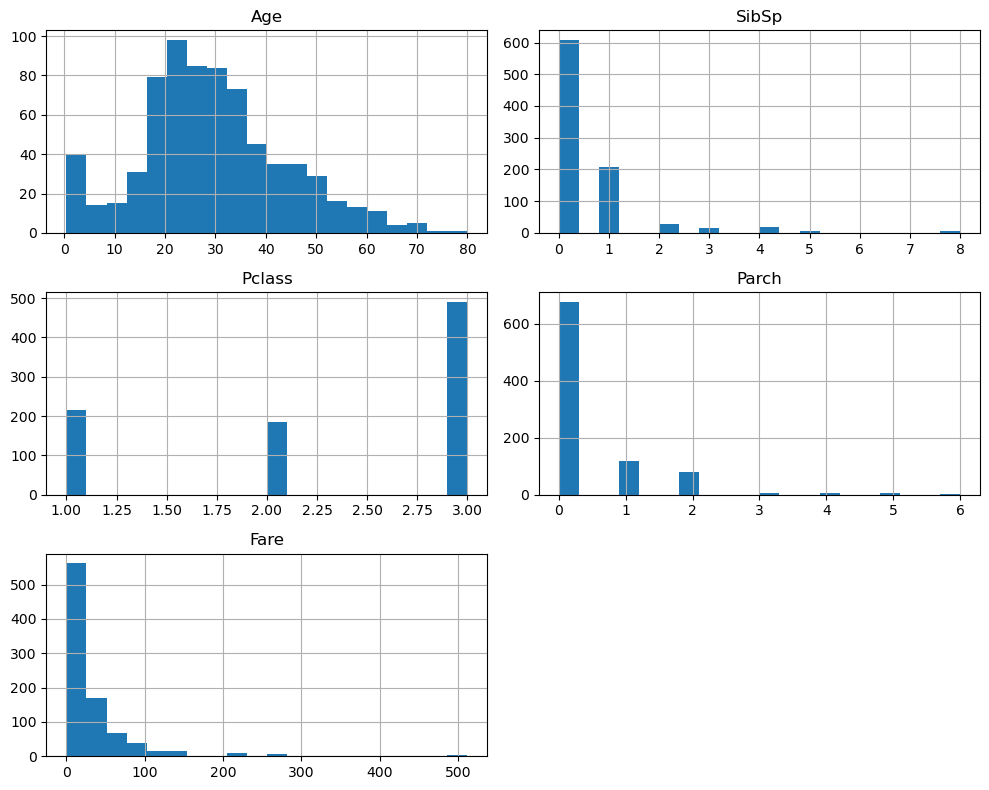

In [13]:
numerical_columns = ['Age', 'SibSp', 'Pclass', 'Parch', 'Fare']
train_data[numerical_columns].hist(figsize=(10, 8), bins=20)
plt.tight_layout()
plt.show()

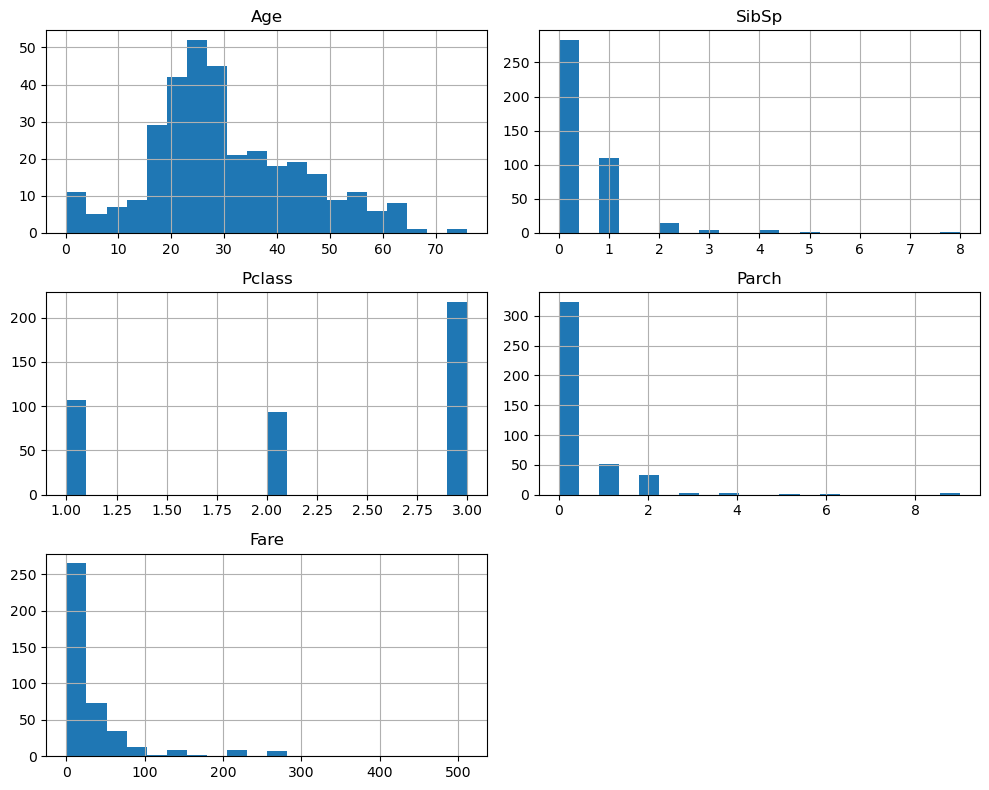

In [14]:
numerical_columns = ['Age', 'SibSp', 'Pclass', 'Parch', 'Fare']
test_data[numerical_columns].hist(figsize=(10, 8), bins=20)
plt.tight_layout()
plt.show()

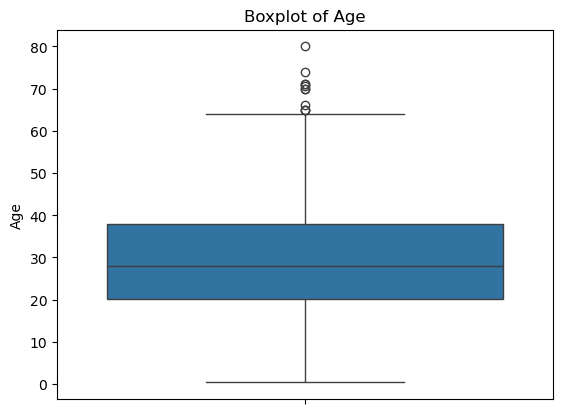

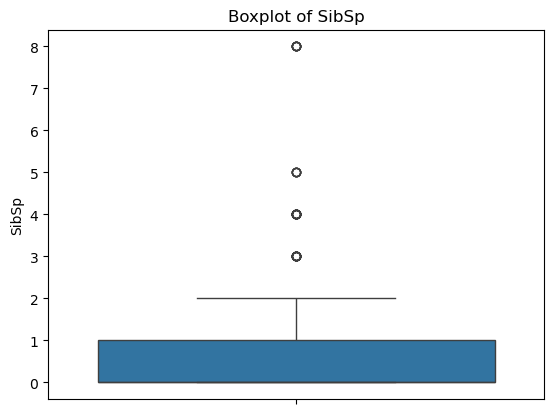

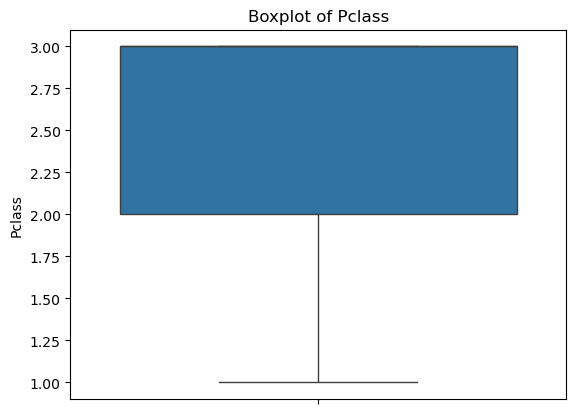

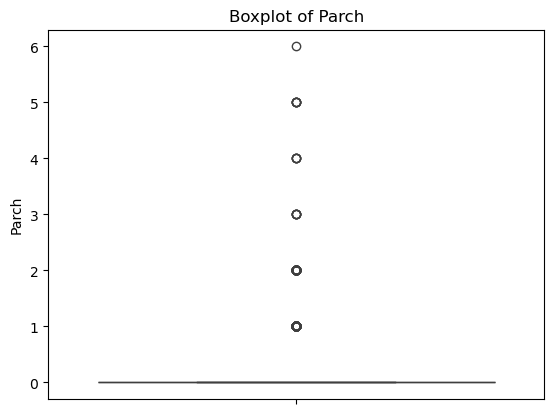

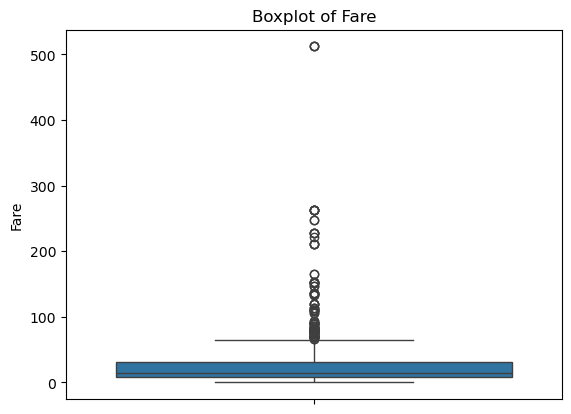

In [15]:
for col in numerical_columns:
    sns.boxplot(y=train_data[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

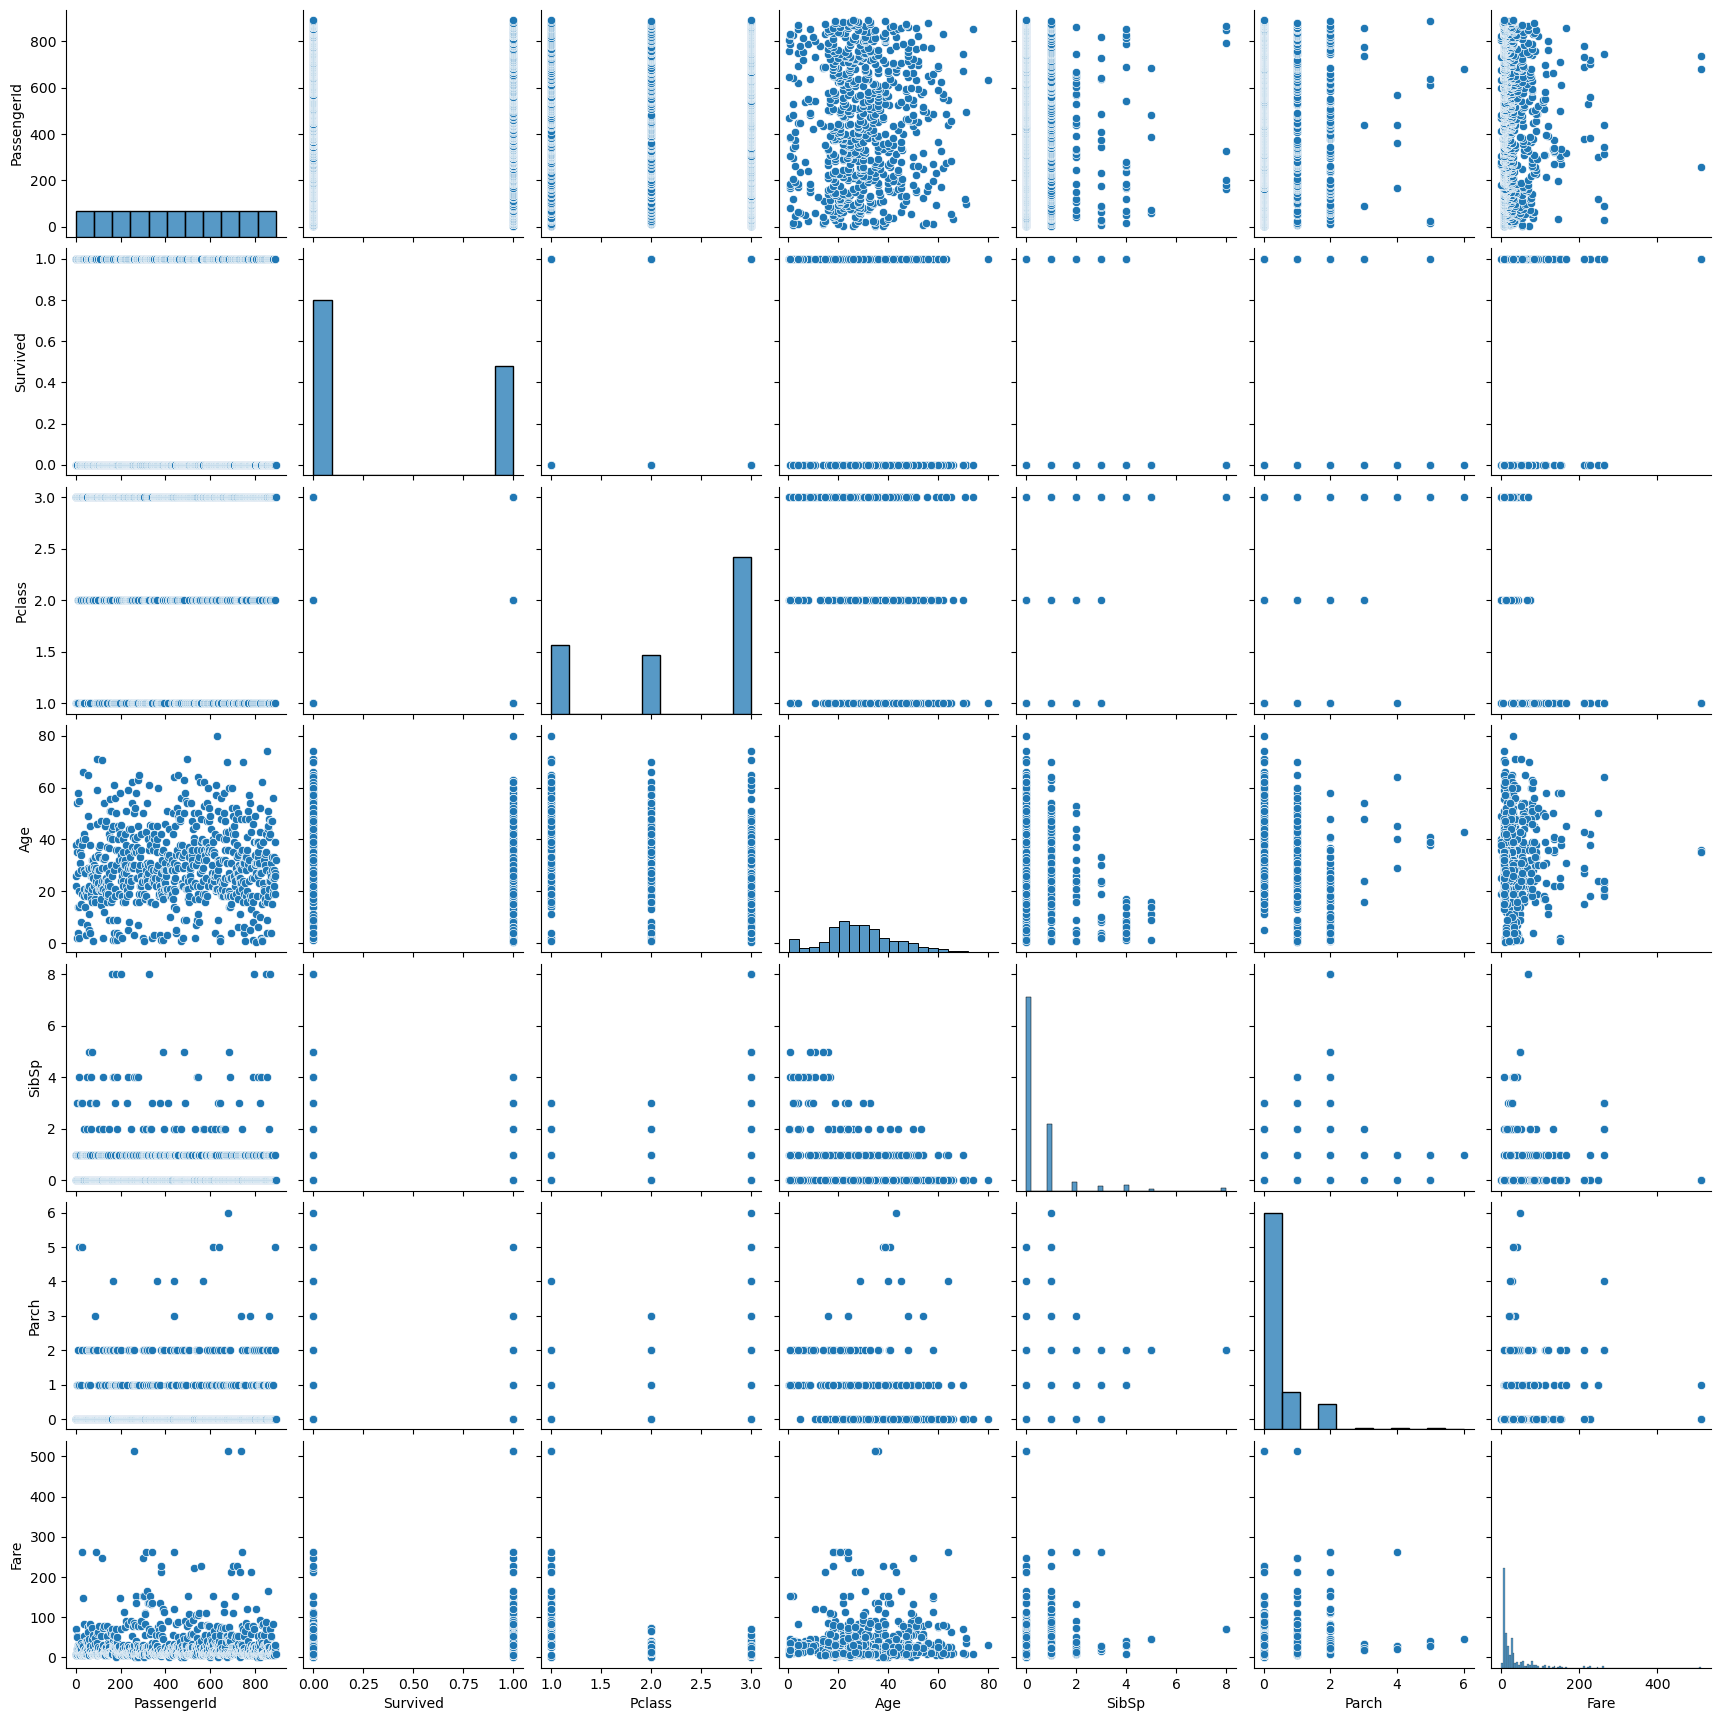

In [16]:
sns.pairplot(data=train_data)

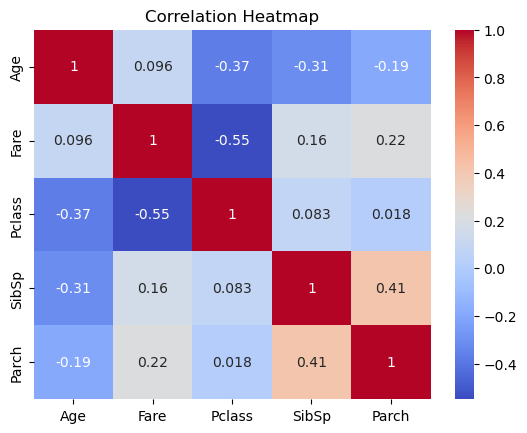

In [17]:
correlation_matrix = train_data[['Age', 'Fare', 'Pclass', 'SibSp', 'Parch']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

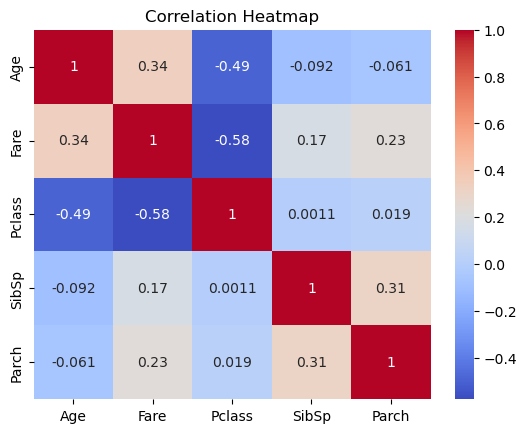

In [18]:
correlation_matrix = test_data[['Age', 'Fare', 'Pclass', 'SibSp', 'Parch']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# 2. Data Preprocessing:

In [30]:
#a. Handle missing values (e.g., imputation).
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [39]:
age_imputer = SimpleImputer(strategy="median")
train_data['Age'] = age_imputer.fit_transform(train_data[['Age']])
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)
print("\nMissing Values:")
print(train_data.isnull().sum())


Missing Values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


In [41]:
age_imputer = SimpleImputer(strategy="median")
test_data['Age'] = age_imputer.fit_transform(test_data[['Age']])
fare_imputer = SimpleImputer(strategy="mean")   # Use mean for Fare
test_data['Fare'] = fare_imputer.fit_transform(test_data[['Fare']])
print("\nMissing Values:")
print(test_data.isnull().sum())


Missing Values:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


# 3. Model Building:

In [80]:
X_train = train_data.drop(columns=['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin'])
y_train = train_data['Survived']
X_test = test_data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])

X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [86]:
numeric_features = ['Age', 'SibSp', 'Parch', 'Fare']
categorical_features = ['Pclass', 'Sex', 'Embarked']

# Preprocessing pipelines for numeric and categorical data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Preprocess the data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

X_train_processed.shape, X_test_processed.shape

((891, 12), (418, 12))

In [87]:
log_reg = LogisticRegression(max_iter=1000, random_state=42)

In [88]:
log_reg.fit(X_train_processed, y_train)
#y_pred = log_reg.predict(X_test_processed)

LogisticRegression(max_iter=1000, random_state=42)

In [89]:
y_pred = log_reg.predict(X_test_processed)
y_prob = log_reg.predict_proba(X_test_processed)[:, 1]
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [95]:
len(y_pred)

418

# 4. Model Evaluation

In [98]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve,confusion_matrix

In [93]:

# Evaluate using various metrics
y_train_pred = log_reg.predict(X_train_processed)

accuracy = accuracy_score(y_train, y_train_pred)
precision = precision_score(y_train, y_train_pred)
recall = recall_score(y_train, y_train_pred)
f1 = f1_score(y_train, y_train_pred)
roc_auc = roc_auc_score(y_train, y_train_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC Score: {roc_auc:.2f}")






Accuracy: 0.81
Precision: 0.77
Recall: 0.70
F1 Score: 0.74
ROC AUC Score: 0.79


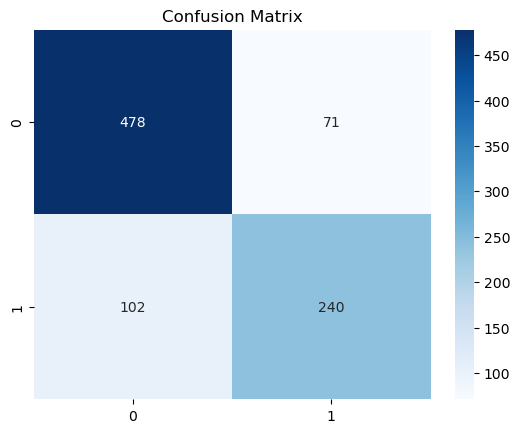

              precision    recall  f1-score   support

           0       0.82      0.87      0.85       549
           1       0.77      0.70      0.74       342

    accuracy                           0.81       891
   macro avg       0.80      0.79      0.79       891
weighted avg       0.80      0.81      0.80       891



In [100]:
cm = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(y_train, y_train_pred))


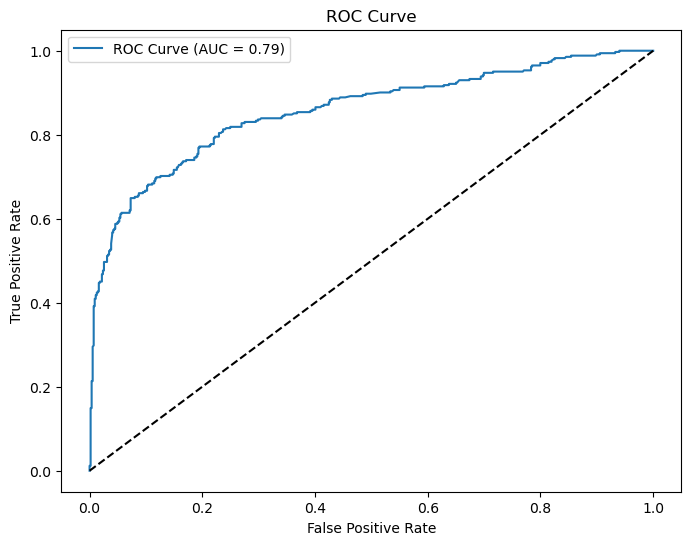

In [77]:
# step 4
# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_train, log_reg.predict_proba(X_train_processed)[:,1])

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label="ROC Curve (AUC = {:.2f})".format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()




In [78]:
# Step 5
# Get feature names after preprocessing
feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features).tolist() + numeric_features

# Print coefficients and their corresponding feature names
coefficients = log_reg.coef_[0]
for feature, coef in zip(feature_names, coefficients):
    print(f"{feature}: {coef:.4f}")


Pclass_1: -0.4810
Pclass_2: -0.3458
Pclass_3: -0.0735
Sex_female: 0.1339
Sex_male: 1.0000
Embarked_C: 0.1438
Embarked_Q: -1.0438
Embarked_S: 1.3778
Age: -1.2779
SibSp: 0.1995
Parch: 0.1279
Fare: -0.2275


In [106]:
import pickle

In [107]:
with open('model.pkl', 'wb') as f:
          pickle.dump(log_reg,f)

In [ ]:
#What is the difference between precision and recall?

# Interview Questions: here's room for improvement.


### 1. What is the difference between precision and recall?

Precision and Recall are two metrics used to evaluate the performance of a classification model,
particularly in the context of imbalanced datasets or when the cost of false positives and false negatives differ.

### 2. What is cross-validation, and why is it important in binary classification?

Cross-validation is a statistical technique used to evaluate the performance of a machine learning model by splitting the data into multiple

subsets (or "folds") and ensuring the model is tested on unseen data. 

This helps ensure that the model's performance is not dependent on a specific train-test split and provides a more reliable estimate of its 

generalization capability.

Avoids Overfitting to a Specific Train-Test Split:

Using a single train-test split may not represent the model's true performance if the split happens to be biased (e.g., one set contains more outliers or a specific class distribution).
Cross-validation evaluates the model on multiple splits, reducing this risk.
Ensures Generalization:

By testing the model on multiple folds, cross-validation provides insight into how well the model generalizes to unseen data, which is critical in binary classification tasks.
Works Well with Imbalanced Datasets:

In binary classification, one class may dominate the dataset. Cross-validation helps ensure that the minority class is included in both training and testing, providing a better estimate of performance.
Prevents Overfitting to Hyperparameters:

During hyperparameter tuning (e.g., using grid search or random search), cross-validation ensures that the performance metric is not biased due to overfitting to a particular split.
Provides Reliable Metrics:

Metrics like accuracy, precision, recall, F1-score, and ROC-AUC are averaged over multiple folds, offering a more reliable estimate of the model's performance.